In [23]:
# ==========================================
# 📦 STEP 0 — INSTALL DEPENDENCIES
# ==========================================
!pip install pymupdf
!pip install ipywidgets
import fitz, re

from google.colab import files

# ==========================================
# ⚙️ STEP 1 — GLOBAL SKILL TAXONOMY
# ==========================================
# ==========================================
# 🧩 UNIVERSAL SKILL TAXONOMY
# ==========================================
skill_taxonomy = {
    "Programming Languages": [
        "Python","Java","C","C++","C#","Go","Rust","Ruby","PHP","Perl",
        "Scala","Kotlin","Swift","TypeScript","JavaScript","R","MATLAB",
        "Objective-C","Dart","Shell","Bash","PowerShell"
    ],
    "Frontend & UI": [
        "React","Next.js","Vue","Angular","Svelte","Bootstrap","Tailwind","Material UI",
        "HTML","CSS","SASS","LESS","jQuery","Figma","Adobe XD","Responsive Design","UI/UX"
    ],
    "Backend & API": [
        "Node.js","Express","NestJS","FastAPI","Flask","Django","Spring","Spring Boot",
        ".NET","ASP.NET","Koa","Laravel","Ruby on Rails","Gin","Fiber","Micronaut",
        "GraphQL","REST","gRPC"
    ],
    "Mobile & Cross-Platform": [
        "React Native","Flutter","SwiftUI","Android","iOS","Kotlin Multiplatform",
        "Xamarin","Ionic","Cordova"
    ],
    "Databases & Data Stores": [
        "MySQL","PostgreSQL","SQLite","SQL Server","Oracle","MariaDB","MongoDB","Redis",
        "Cassandra","CouchDB","DynamoDB","Elasticsearch","Firestore","Neo4j","Snowflake",
        "BigQuery","Athena","InfluxDB","Redshift"
    ],
    "Cloud & DevOps": [
        "AWS","Azure","GCP","Google Cloud","IBM Cloud","Oracle Cloud",
        "Docker","Kubernetes","Terraform","Ansible","Puppet","Chef",
        "CloudFormation","Serverless","Lambda","EKS","AKS","GKE",
        "CI/CD","GitHub Actions","GitLab CI","CircleCI","Jenkins",
        "ArgoCD","Prometheus","Grafana","Datadog","Splunk","New Relic",
        "Networking","Load Balancer","Monitoring"
    ],
    "Machine Learning & AI": [
        "TensorFlow","PyTorch","Scikit-learn","Keras","XGBoost","LightGBM",
        "CatBoost","BERT","GPT","LLM","LangChain","RAG","Transformers",
        "OpenAI","Hugging Face","MLflow","Kubeflow","Weights & Biases",
        "Deep Learning","Computer Vision","NLP","OCR","Recommendation Systems",
        "Speech Recognition","Data Preprocessing","Feature Engineering"
    ],
    "Data Engineering": [
        "Hadoop","Spark","PySpark","Flink","Beam","Kafka","Airflow","NiFi",
        "Databricks","ETL","Data Pipeline","Data Lake","Data Warehouse",
        "Streaming","Batch Processing","Delta Lake"
    ],
    "Analytics & BI": [
        "Tableau","Power BI","Looker","Excel","Google Sheets","QuickSight",
        "Matplotlib","Seaborn","Plotly","ggplot2","D3.js","Statistics",
        "Regression","Forecasting"
    ],
    "Testing & QA": [
        "Selenium","Cypress","Jest","Mocha","PyTest","JUnit","TestNG",
        "Postman","Cucumber","Playwright","Appium","LoadRunner","JMeter"
    ],
    "Security & Infra": [
        "OAuth","JWT","SAML","OpenID","Keycloak","Okta","Penetration Testing",
        "Vulnerability Scanning","Encryption","Firewall","TLS","SSL","OWASP",
        "Zero Trust","Identity Management"
    ],
    "Version Control & PM": [
        "Git","GitHub","GitLab","Bitbucket","SVN","Mercurial",
        "JIRA","Confluence","Trello","Asana","Slack","MS Teams",
        "Agile","Scrum","Kanban","SDLC","TDD","BDD"
    ],
    "Automation & RPA": [
        "UIPath","Automation Anywhere","Blue Prism","Power Automate","Zapier","Workato"
    ],
    "Operating Systems": [
        "Linux","Ubuntu","CentOS","Red Hat","Windows","macOS"
    ]
}

# Flatten
all_skills = sorted(set(sum(skill_taxonomy.values(), [])))

# ==========================================
# 🧩 STEP 2 — COMPILE REGEX FOR BOUNDARY MATCHING
# ==========================================
def compile_skill_patterns(skills):
    patterns = {}
    for s in skills:
        safe = re.escape(s.lower())
        # word boundaries but allow . and +
        patterns[s] = re.compile(rf"(?<!\w){safe}(?!\w)", re.IGNORECASE)
    return patterns

compiled_skills = compile_skill_patterns(all_skills)

# ==========================================
# 📄 STEP 3 — TEXT EXTRACTION & NORMALIZATION
# ==========================================
def extract_text_lines(pdf_path):
    lines = []
    with fitz.open(pdf_path) as pdf:
        for page in pdf:
            for line in page.get_text("text").split("\n"):
                if line.strip():
                    lines.append(line.strip())
    return lines

def normalize_line(line):
    line = line.lower()
    line = re.sub(r"[\/\-–—_]+", " ", line)       # unify separators
    line = re.sub(r"[^a-z0-9+#\s]", " ", line)    # keep alphanum, +, #
    line = re.sub(r"\s+", " ", line).strip()
    return line

# ==========================================
# ⚡ STEP 4 — FAST SKILL EXTRACTION
# ==========================================
def extract_skills_from_lines(lines, compiled):
    found = set()
    for line in lines:
        norm = normalize_line(line)
        for skill, pattern in compiled.items():
            if pattern.search(norm):
                found.add(skill)
    return found

# ==========================================
# 📥 STEP 5 — UPLOAD RESUME
# ==========================================
print("🔼 Upload your Resume PDF")
uploaded = files.upload()
resume_path = list(uploaded.keys())[0]
print(f"✅ File loaded: {resume_path}")

resume_lines = extract_text_lines(resume_path)
resume_skills = extract_skills_from_lines(resume_lines, compiled_skills)
print(f"📘 Extracted {len(resume_skills)} skills from resume.")




🔼 Upload your Resume PDF


Saving SREE TEJOMAYI YASASWINI  TATIKONDA_Software Engineer 1_20251106.pdf to SREE TEJOMAYI YASASWINI  TATIKONDA_Software Engineer 1_20251106 (5).pdf
✅ File loaded: SREE TEJOMAYI YASASWINI  TATIKONDA_Software Engineer 1_20251106 (5).pdf
📘 Extracted 33 skills from resume.


In [24]:
# ==========================================
# 🧾 STEP 6 — DYNAMIC JOB DESCRIPTION INPUT
# ==========================================
import ipywidgets as widgets
from IPython.display import display

# Create a dynamic text box for JD input
jd_widget = widgets.Textarea(
    value='Paste or type your job description here...',
    placeholder='Enter job description text',
    description='Job Description:',
    layout=widgets.Layout(width='900px', height='250px')
)

display(jd_widget)

print("👇 After pasting or editing your JD above, run the next cell to continue.")

Textarea(value='Paste or type your job description here...', description='Job Description:', layout=Layout(hei…

👇 After pasting or editing your JD above, run the next cell to continue.


In [26]:
# ==========================================
# Capture JD Text + Extract Skills
# ==========================================
job_description = jd_widget.value
print("\n✅ Job Description captured successfully!")
print(job_description[:400], "...")

# Normalize and extract JD skills
jd_lines = [normalize_line(job_description)]
jd_skills = extract_skills_from_lines(jd_lines, compiled_skills)
print(f"🧠 Extracted {len(jd_skills)} skills from Job Description.\n")



✅ Job Description captured successfully!
JOB SUMMARY:
This is a hands-on software design engineering position within the product development team. This employee plays a key role in the design of PC, browser and server-based application software. Depending on the project, the employee will either work as an individual or as part of a multi-disciplinary team. The employee sometimes directs the work of other engineers, designers and technic ...
🧠 Extracted 9 skills from Job Description.



In [28]:
# ==========================================
# 🎯 STEP 7 — SKILL MATCH COMPARISON
# ==========================================
matched = resume_skills & jd_skills
missing = jd_skills - resume_skills
match_score = round((len(matched) / len(jd_skills)) * 100, 2) if jd_skills else 0

print("===== 📊 Skill Match Report =====")
print(f"✅ Matched Skills ({len(matched)}): {', '.join(sorted(matched)) or 'None'}")
print(f"🚧 Missing Skills ({len(missing)}): {', '.join(sorted(missing)) or 'None'}")
print(f"🎯 Match Score: {match_score}%")

# ==========================================
# 📦 STEP 8 — OPTIONAL: JSON OUTPUT (for API / saving)
# ==========================================
import json
report = {
    "resume_file": resume_path,
    "resume_skill_count": len(resume_skills),
    "jd_skill_count": len(jd_skills),
    "matched_skills": sorted(list(matched)),
    "missing_skills": sorted(list(missing)),
    "match_score": match_score
}

with open("skill_match_report.json", "w") as f:
    json.dump(report, f, indent=2)

print("\n📁 JSON report saved: skill_match_report.json")

===== 📊 Skill Match Report =====
✅ Matched Skills (5): C, C#, CSS, HTML, Python
🚧 Missing Skills (4): Git, Linux, SVN, Windows
🎯 Match Score: 55.56%

📁 JSON report saved: skill_match_report.json


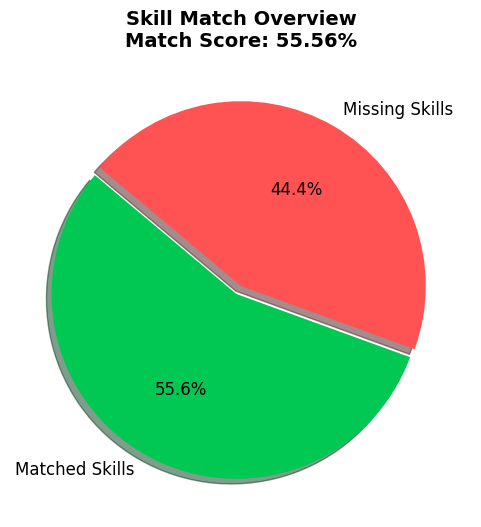

In [29]:
# ==========================================
# 🎨 STEP 9 — PIE CHART VISUALIZATION
# ==========================================
import matplotlib.pyplot as plt

# Data
labels = ['Matched Skills', 'Missing Skills']
sizes = [len(matched), len(missing)]
colors = ['#00c853', '#ff5252']  # green, red
explode = (0.05, 0)              # slightly separate matched slice

# Create figure
plt.figure(figsize=(6, 6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    colors=colors, shadow=True, explode=explode, textprops={'fontsize': 12}
)
plt.title(f"Skill Match Overview\nMatch Score: {match_score}%", fontsize=14, fontweight='bold')
plt.show()


In [37]:
%%writefile app.py
from fastapi import FastAPI, UploadFile, Form
from fastapi.middleware.cors import CORSMiddleware
import fitz, re, json

# ==============================================================
# 🚀 1. APP SETUP
# ==============================================================
app = FastAPI(title="AI Resume Analyzer", version="2.0")

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# ==============================================================
# 🧠 2. UNIVERSAL SKILL TAXONOMY
# ==============================================================
skill_taxonomy = {
    "Programming Languages": [
        "Python","Java","C","C++","C#","Go","Rust","Ruby","PHP","Perl",
        "Scala","Kotlin","Swift","TypeScript","JavaScript","R","MATLAB",
        "Objective-C","Dart","Shell","Bash","PowerShell"
    ],
    "Frontend & UI": [
        "React","Next.js","Vue","Angular","Svelte","Bootstrap","Tailwind","Material UI",
        "HTML","CSS","SASS","LESS","jQuery","Figma","Adobe XD","Responsive Design","UI/UX"
    ],
    "Backend & API": [
        "Node.js","Express","NestJS","FastAPI","Flask","Django","Spring","Spring Boot",
        ".NET","ASP.NET","Koa","Laravel","Ruby on Rails","Gin","Fiber","Micronaut",
        "GraphQL","REST","gRPC"
    ],
    "Mobile & Cross-Platform": [
        "React Native","Flutter","SwiftUI","Android","iOS","Xamarin","Ionic","Cordova"
    ],
    "Databases": [
        "MySQL","PostgreSQL","SQLite","SQL Server","Oracle","MongoDB","Redis",
        "Cassandra","CouchDB","DynamoDB","Elasticsearch","Firestore","Neo4j",
        "Snowflake","BigQuery","Athena","InfluxDB","Redshift"
    ],
    "Cloud & DevOps": [
        "AWS","Azure","GCP","Docker","Kubernetes","Terraform","Ansible",
        "Puppet","Chef","CloudFormation","Serverless","Lambda","EKS","AKS","GKE",
        "CI/CD","GitHub Actions","GitLab CI","CircleCI","Jenkins","ArgoCD",
        "Prometheus","Grafana","Datadog","Splunk","New Relic","Networking"
    ],
    "Machine Learning & AI": [
        "TensorFlow","PyTorch","Scikit-learn","Keras","XGBoost","LightGBM","CatBoost",
        "BERT","GPT","LLM","LangChain","RAG","Transformers","OpenAI","Hugging Face",
        "MLflow","Kubeflow","Weights & Biases","Deep Learning","Computer Vision",
        "NLP","OCR","Recommendation Systems","Speech Recognition","Feature Engineering"
    ],
    "Data Engineering": [
        "Hadoop","Spark","PySpark","Flink","Kafka","Airflow","NiFi","Databricks",
        "ETL","Data Pipeline","Data Lake","Data Warehouse","Streaming","Batch Processing"
    ],
    "Analytics & BI": [
        "Tableau","Power BI","Looker","Excel","Google Sheets","QuickSight",
        "Matplotlib","Seaborn","Plotly","Statistics","Regression","Forecasting"
    ],
    "Testing & QA": [
        "Selenium","Cypress","Jest","Mocha","PyTest","JUnit","TestNG",
        "Postman","Cucumber","Playwright","Appium","JMeter"
    ],
    "Security & Infra": [
        "OAuth","JWT","SAML","OpenID","Keycloak","Okta","Penetration Testing",
        "Vulnerability Scanning","Encryption","Firewall","TLS","SSL","OWASP","Zero Trust"
    ],
    "Version Control & PM": [
        "Git","GitHub","GitLab","Bitbucket","SVN","Mercurial",
        "JIRA","Confluence","Trello","Asana","Slack","MS Teams","Agile","Scrum","Kanban"
    ],
    "Automation & RPA": [
        "UIPath","Automation Anywhere","Blue Prism","Power Automate","Zapier","Workato"
    ],
    "Operating Systems": [
        "Linux","Ubuntu","CentOS","Red Hat","Windows","macOS"
    ]
}

ALL_SKILLS = sorted(set(sum(skill_taxonomy.values(), [])))

# ==============================================================
# ⚙️ 3. HELPERS
# ==============================================================
def normalize(text: str) -> str:
    text = text.lower()
    text = re.sub(r"[\/\-–—_]+", " ", text)
    text = re.sub(r"[^a-z0-9+#\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def extract_skills(text: str):
    text = normalize(text)
    found = set()
    for skill in ALL_SKILLS:
        safe = re.escape(skill.lower())
        if re.search(rf"(?<!\w){safe}(?!\w)", text):
            found.add(skill)
    return found

def extract_text_from_pdf(file_bytes):
    text = ""
    pdf = fitz.open(stream=file_bytes, filetype="pdf")
    for page in pdf:
        text += page.get_text("text")
    return text

# ==============================================================
# 🔍 4. API ROUTES
# ==============================================================
@app.get("/")
def home():
    return {"message": "✅ AI Resume Analyzer backend (v2.0) is live!"}

@app.post("/analyze")
async def analyze_resume(file: UploadFile, job_description: str = Form(...)):
    pdf_bytes = await file.read()
    resume_text = extract_text_from_pdf(pdf_bytes)
    jd_text = normalize(job_description)

    resume_skills = extract_skills(resume_text)
    jd_skills = extract_skills(jd_text)

    matched = sorted(resume_skills & jd_skills)
    missing = sorted(jd_skills - resume_skills)
    score = round((len(matched) / len(jd_skills) * 100), 2) if jd_skills else 0

    return {
        "resume_skill_count": len(resume_skills),
        "jd_skill_count": len(jd_skills),
        "matched_skills": matched,
        "missing_skills": missing,
        "match_score": score
    }


Overwriting app.py


In [38]:
!ngrok config add-authtoken 358aw4V3EGF00X7DApwUavESzol_BRBUvtGWbfgPkWpniqQL

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [39]:
!pip install fastapi uvicorn pyngrok
from pyngrok import ngrok
!kill $(lsof -t -i:8000) 2>/dev/null || true
ngrok_tunnel = ngrok.connect(8000)
print("Public URL:", ngrok_tunnel.public_url)
!uvicorn app:app --host 0.0.0.0 --port 8000


Public URL: https://submontane-delta-effervescingly.ngrok-free.dev
INFO:     Started server process [19957]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     152.117.104.199:0 - "POST /analyze HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Finished server process [19957]
ERROR:    Traceback (most recent call last):
  File "/usr/lib/python3.12/asyncio/runners.py", line 195, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/asyncio/base_events.py", line 678, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
    self._run_once()
  File "/usr/lib/python3.12/asyncio/base_events.py", line 1999, in _run_onc

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
